# Transforming Healthcare with Data Analytics and AI

---

## Module 10: Linear Regression

This week we learned about how to **quantify and model linear relationships** in data. Now we're going to apply the techniques learned in this module to data from the MIMIC-II clinical database. 

As you saw in the previous module, the MIMIC-II clinical database consists of data collected in a US intensive care unit and contains a large amount of information such as **patient demographics** **medications, lab tests, events** and more.

### Activities

The ultimate goal of this notebook will be to develop a model that predicts the time that an ICU patient is likely to be intubated for. We will spend the first two activities reviewing some of the key concepts in the module to ensure you have a good understanding of them.

There are three activities in this notebook:

*  **Activity 1**: Correlation and $r^2$
*  **Activity 2**: Line of best fit and Mean Squared Error (MSE)
*  **Activity 3**: Multiple linear regression for predicting duration of intubation


Doing the activities will help you to understand the benefits and limitations of regression modelling, which is probably the most widely used statistical and machine learning modelling technique. It has broad applicability to a range of problems in healthcare and hopefully you will be able to apply it to some of your own work in the future.

### How to use this notebook

- You are not expected to understand how all the Python code works, but should be comfortable running the code blocks and interacting with the visualisations to answer the questions.
- The notebook should be followed in sequential order.
- If you click on the hamburger icon on the far left it will show a table of contents where you can jump to a given section

# Import all the relevant Python packages

These cells import the relevant functions for carrying out the analysis, and ensure that the results are displayed correctly.

In [1]:
from d2k_utils import *

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
plt.rcParams['figure.max_open_warning'] = 100  # or any other number

%matplotlib inline

## Activity 1: Correlations and $r^2$

The correlation coefficient summarises important information about the relationship between two variables. This activity will help you to develop some intuition for the coefficient, and how it can capture important relationships between clinical variables.

The code below creates a scatter plot and calculates Pearson's correlation coefficient along with a corresponding p-value for `first_heart_rate` and `first_resp_rate` variables, similar to that seen in the module in Canvas. 

**For this activity you will complete the following exercises in your worksheet**

Use the dropdown boxes to experiment with different combinations of variables and record in your worksheet three pairs of variables that you thought were interesting. Then for each pair, answer the following questions:
1) What is the strength of the correlation coefficient? What is the value of $r^2$?
2) What is the direction of the relationship?
3) What proportion of variance in one variable is explained by the other?
4) Are these results what would be expected clinically? Why / why not?

### 1.1. Create a scatterplot of two variables

In the interactive scatterplot below you can select different pairs of variables and see the resulting points drawn on the plot, along with the correlation coefficient between the variables and p-value.

The tables below show the variables that you can select and provide a brief description of each one. There are five types of variables: **demographics**, **timing**, **vital signs**, **lab values** and **scores**.

### Numerical demographic variables

| Variable Name              | Description                                    |
|----------------------------|------------------------------------------------|
| age                        | Age of the patient in years                    |

---

### Time variables

| Variable Name              | Description                                    |
|----------------------------|------------------------------------------------|
| icustay_los                | Length of ICU stay (in minutes)                   |
| extub_time                 | Time of extubation (removal of breathing tube) |
| time_elapsed_seconds       | Time elapsed in seconds  |

---

### Vital Sign

| Variable Name              | Description                                    |
|----------------------------|------------------------------------------------|
| first_heart_rate           | First recorded value of an ICU patient's heart rate|
| first_resp_rate            | First recorded value of an ICU patient's respiratory rate|
| mean_Heart Rate            | Average heart rate during observation period   |
| mean_Respiratory Rate      | Average respiratory rate during observation period |
| mean_FiO2 Set              | Average fraction of inspired oxygen set        |
| FiO2_Set                   | Fraction of inspired oxygen at set point       |
| Tidal Volume (Obser)       | Observed tidal volume during ventilation       |
| Arterial BP Mean           | Mean arterial blood pressure                   |

---

### Lab Values

| Variable Name              | Description                                    |
|----------------------------|------------------------------------------------|
| Albumin (>3.2)             | Serum albumin level, with >3.2 g/dL threshold  |
| Arterial pH                | pH level of arterial blood                     |
| Creatinine (0-1.3)         | Serum creatinine level, with normal range 0-1.3 mg/dL |
| hgb                        | Hemoglobin level                               |
| PaO2                       | Partial pressure of oxygen in arterial blood   |
| PaCO2                      | Partial pressure of carbon dioxide in arterial blood |
| WBC                        | White blood cell count                         |

---

### Clinical scores

| Variable Name              | Description                                    |
|----------------------------|------------------------------------------------|
| elixhauser_score           | Comorbidity score based on the Elixhauser index |
| Respiratory SOFA Score     | Respiratory component of SOFA score            |
| Overall SOFA Score         | Total SOFA score across all components         |


In [3]:
# Load the data
df = pd.read_csv("ext_data.csv").loc[:, cols]

In [4]:
# create the interactive scatter plot
interact(scatter_plot,
         dataset=widgets.fixed(df),
         x_var=widgets.Dropdown(options=df.columns, value='first_heart_rate', description="X Variable"),
         y_var=widgets.Dropdown(options=df.columns, value='first_resp_rate', description="Y Variable"))

interactive(children=(Dropdown(description='X Variable', index=19, options=('icustay_los', 'age', 'time_elapse…

<function d2k_utils.scatter_plot(dataset, x_var, y_var)>

# Activity 2: Line of best fit

Now we're going to start fitting linear models to the data. We will begin by experimenting with different values of the gradient and intercept. We will do this for `first heart rate` vs `first respiratory rate`. These are the first recorded values of these variables for each patient. 

While this may not be a particularly interesting or surprising relationship, linear models can be fit to any numerical clinical variable. They helps us to quantify how an output variable changes when the input variable changes.

The interactive plot has two sliders that allow you to select different values for the intercept and gradient and see what the resulting linear model looks like. The chart also shows the $r^2$ and Mean Squared Error (MSE). You should be able to see the effect the different values of the gradient and intercept have on $r^2$ and MSE.

**For this activity you will complete the following exercises in your worksheet**

Experiment with different values of the gradient and intercept and record three sets of (gradient, intercept) values
1) What is the value of $r^2$?
2) What is the MSE?
3) How can you interpret the intercept (slope)?

Can you find a set of parameter values that gives the smallest MSE (and the largest $r^2$)

### 2.1. Create a scatterplot and adjustable regression line

Running the code below produces a scatter plot along with an adjustable line of best fit. Changing the intercept and slope changes the resulting linear model, allowing you to see the effect this has on the Mean Squared Error and $r^2$.

You will notice that the $r^2$ can in some cases be negative here. This occurs when the model is worse at predicting the respiratory rate than simple taking the average respiratory rate. For the best-fitting line, the $r^2$ is equal to the square of the correlation coefficient, as was defined previously.

In [5]:
df = pd.read_csv("ext_data.csv").loc[:, ['first_heart_rate', 'first_resp_rate']].dropna()

In [6]:
interact(plot_linear_regression, 
         df=fixed(df), x_variable=fixed("first_heart_rate"), y_variable=fixed("first_resp_rate"),
         x_min=fixed(0), x_max=fixed(250), y_min=fixed(0), y_max=fixed(100), 
         num_points=fixed(1000), intercept=(10, 15.2, 0.0011), slope=(0.001, 0.3, 0.001));

interactive(children=(FloatSlider(value=12.5993, description='intercept', max=15.2, min=10.0, step=0.0011), Fl…

## 2.2. Find the model that has the smallest Mean Squared Error (MSE)

Now run the following code to see the results where the line of best fit has been identified by minimising the mean of the square root of each tidal volume predicted from respiratory rate compared to each observed tidal volume. 

**Answer the following in your worksheet:**
- What are the values of $r^2$ and MSE for the optimal choice of intercept and gradient?
- What are the corresponding values of the gradient and intercept? How can these be interpreted? 

In [7]:
X, y = zip(*
           pd.read_csv("ext_data.csv")
           .loc[:, ["first_heart_rate", "first_resp_rate"]]
           .dropna()
           .values
          )

X, y = np.array(X).reshape(-1, 1), np.array(y)

In [8]:
# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# optimal values of gradient and intercept
intercept, gradient = model.intercept_, model.coef_[0]

# Make predictions
y_pred = model.predict(X)

# Calculate metrics
mse = np.round(mean_squared_error(y, y_pred), 3)
r2 = np.round(r2_score(y, y_pred), 3)

# the intercept and gradient for the line of best fit
gradient_best, intercept_best = np.round(model.coef_[0], 2), np.round(model.intercept_, 2)

# text to display in title of scatterplot
title_text = f'{"first_heart_rate"} vs {"first_resp_rate"}\ny = {gradient_best}x + {intercept_best}\nMSE = {mse}\n$r^2$ = {r2}\ngradient: {gradient_best}\nintercept: {intercept_best}'

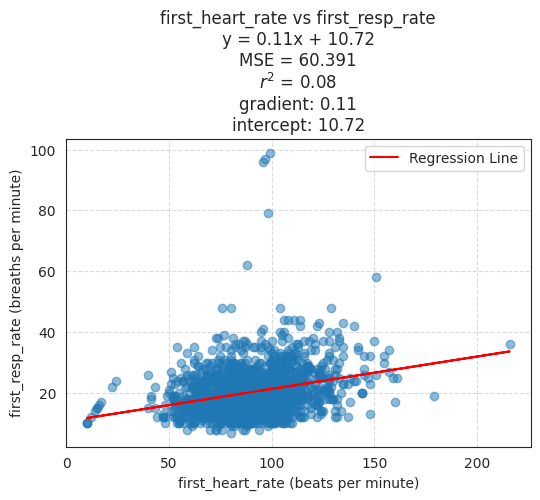

In [9]:
# Create the scatter plot with regression line
plt.figure(figsize=(6, 4))
plt.scatter(X, y, alpha=0.5)
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.title(title_text)
plt.xlabel("first_heart_rate (beats per minute)")
plt.ylabel("first_resp_rate (breaths per minute)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Activity 3: Multiple linear regression

Now that you understand better how MSE, $r^2$ change when fitting a linear regression model we will apply linear regression to the following problem:

> Activity 3 goal: Predict the length of time that a patient is intubated for

In the module we touched on the idea of multivariable regression models, which extend simple linear regression by including additional variables. This is partly what makes linear regression such a powerful technique, as you can include as many variables as you like, which provides the model with a larger and more diverse amount of information to draw upon when making predictions.

There are some important caveats here:
1. With each additional predictor, the proportion of the variance explained by the predictors (i.e., the $r^2$ value) should increase
2. A model that predicts the outcome perfectly is not always useful, as this will not necessarily perform well with a new sample. We will cover this in more detail in the next module
3. A 'good' model should find a balance between the number of predictors and the value that each one brings in explaining the outcome

**Answer the following in your worksheet:**
For each set of variables record the following
- The value of MSE and $r^2$
- Possible reasons why different variables may contribute to the change in these values
   
### Choice of variables

We will consider a few different combinations of variables to understand the effect that inclusion of additional variables has on the predictive accuracy of the model.

| Model | Variable |
| --- | --- |
| 1 | hgb |
| 2 | hgb |
|  | Respiratory SOFA Score |
| 3 | hgb |
|  | Respiratory SOFA Score |
| | age |
| 4 | hgb |
|  | Respiratory SOFA Score |
| | age |
| | mean_Respiratory Rate |
| | PaCO2 |
| | Overall SOFA Score |
| | PaO2 |
| | WBC |
| | Albumin (>3.2) |
| | mean_FiO2 Set |
| 5 | hgb |
|  | Respiratory SOFA Score |
| | age |
| | mean_Respiratory Rate |
| | PaCO2 |
| | Overall SOFA Score |
| | PaO2 |
| | WBC |
| | Albumin (>3.2) |
| | mean_FiO2 Set |
| | icustay_los |

In [10]:
# load the data with all the required vairables
variables_full = ['hgb', 
                  'Respiratory SOFA Score',
                  'age',
                  'first_resp_rate', 
                  'PaCO2',
                  'WBC', 
                  'Albumin (>3.2)', 
                  'mean_FiO2 Set', 
                  'icustay_los']

data = (
    pd.read_csv('ext_data.csv')
    .loc[:, variables_full + ['time_elapsed_seconds']]
    .assign(time_elapsed_hours=lambda df_: df_.time_elapsed_seconds / 3600)
    .dropna()
)

## 3.1. First set of variables: haemglobin

Run the following code, and then go to your group worksheet 

In [11]:
variables1 = ['hgb']

In [12]:
# Prepare the features (X) and target variable (y)
X = data.loc[:, variables1].values
y = data.loc[:, 'time_elapsed_hours'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

In [13]:
# calculate the mean squared error and the r2
mse = np.round(mean_squared_error(y, y_pred), 3)
r2 = np.round(r2_score(y, y_pred), 3)

print(f"MSE: {mse}\nR^2: {r2}")

MSE: 24856.551
R^2: 0.009


## 3.2. Second set of variables

Now we will include some additional variables so we will use the following in our set
- Haemoglobin
- Respiratory SOFA Score

In [14]:
variables2 = ['hgb', 'Respiratory SOFA Score']

In [15]:
# Prepare the features / variables (X) and target variable (y)
X = data.loc[:, variables2].values
y = data.loc[:, 'time_elapsed_hours'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

In [16]:
# calculate the mean squared error and the r2
mse = np.round(mean_squared_error(y, y_pred), 3)
r2 = np.round(r2_score(y, y_pred), 3)

print(f"MSE: {mse}\nR^2: {r2}")

MSE: 24484.188
R^2: 0.024


## 3.3. Third set of variables

Let's see what the effect of including demographic variables is. We will include age so that our group of variables is now:

- Haemoglobin
- Respiratory SOFA Score
- Age

In [17]:
variables3 = ['hgb', 
              'Respiratory SOFA Score',
              'age']

In [18]:
# Prepare the features / variables (X) and target variable (y)
X = data.loc[:, variables3].values
y = data.loc[:, 'time_elapsed_hours'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

In [19]:
# calculate the mean squared error and the r2
mse = np.round(mean_squared_error(y, y_pred), 3)
r2 = np.round(r2_score(y, y_pred), 3)

print(f"MSE: {mse}\nR^2: {r2}")

MSE: 24256.902
R^2: 0.033


## 3.4. Fourth set of variables

Let's see what happens when include a large number of variables as shown below. 

- hgb
- Respiratory SOFA Score
- age
- first_resp_rate
- PaCO2
- WBC
- Albumin (>3.2)
- mean_FiO2 Set

In [20]:
variables4 = ['hgb', 
              'Respiratory SOFA Score',
              'age',
              'first_resp_rate', 
              'PaCO2',
              'WBC', 
              'Albumin (>3.2)', 
              'mean_FiO2 Set']

In [21]:
# Prepare the features / variables (X) and target variable (y)
X = data.loc[:, variables4].values
y = data.loc[:, 'time_elapsed_hours'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

In [22]:
# calculate the mean squared error and the r2
mse = np.round(mean_squared_error(y, y_pred), 3)
r2 = np.round(r2_score(y, y_pred), 3)

print(f"MSE: {mse}\nR^2: {r2}")

MSE: 22581.709
R^2: 0.1


## 3.5. Fifth set of variables

Now we will include an additional variable, `icustay_los`, to see how this improves the performance

**In your worksheet, answer the following**

- What effect does this have on MSE and $r^2$?
- Why does the variable `icustay_loss` improve the model performance?

In [23]:
variables5 = ['hgb', 
              'Respiratory SOFA Score',
              'age',
              'first_resp_rate', 
              'PaCO2',
              'WBC', 
              'Albumin (>3.2)', 
              'mean_FiO2 Set', 
              'icustay_los']

In [24]:
# Prepare the features / variables (X) and target variable (y)
X = data.loc[:, variables5].values
y = data.loc[:, 'time_elapsed_hours'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

In [25]:
# calculate the mean squared error and the r2
mse = np.round(mean_squared_error(y, y_pred), 3)
r2 = np.round(r2_score(y, y_pred), 3)

print(f"MSE: {mse}\nr^2: {r2}")

MSE: 17252.249
r^2: 0.312
